In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_description = open("data_description.txt", "r")
print(data_description.read())
data_description.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [172]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [173]:
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [175]:
len(df_train[df_train.duplicated()])

0

In [176]:
df_train.shape

(1460, 80)

## Handling Missing Values

In [177]:
def columns_null_values(data):
    # Verifying the presence of missing values
    null_vals = data.isnull().sum()[data.isnull().sum() > 0]

    # Creating a table with numbers of missing values
    cols = {"null_count": null_vals.values}
    null_df = pd.DataFrame(data=cols, index=null_vals.index)

    # Adding shares of missing values
    null_df["null_fraction"] = null_df["null_count"] / data.shape[0]
    null_df["null_fraction"] = null_df["null_fraction"].round(4)

    # Adding data types
    null_df["dtype"] = data[null_df.index].dtypes
    null_df = null_df[["null_count", "null_fraction","dtype"]].sort_values(
        by=["dtype","null_count"], ascending=False)

    return null_df

In [178]:
miss_vals = columns_null_values(df_train)
miss_vals

,null_count,null_fraction,dtype
PoolQC,1453,0.9952,object
MiscFeature,1406,0.9630,object
Alley,1369,0.9377,object
Fence,1179,0.8075,object
FireplaceQu,690,0.4726,object
GarageType,81,0.0555,object
GarageFinish,81,0.0555,object
GarageQual,81,0.0555,object
GarageCond,81,0.0555,object
BsmtExposure,38,0.0260,object


In [179]:
# Dealing with the NaN values in numeric columns
num_cols = ["GarageYrBlt","MasVnrArea","LotFrontage"]
for col in num_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

In [181]:
# Dealing with the NaN values in object columns
cat_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "MasVnrType", "Electrical"]

for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [182]:
df_train.shape

(1460, 80)

In [183]:
miss_vals = columns_null_values(df_train)
miss_vals

,null_count,null_fraction,dtype


# EDA
## Numeric Features Distribution

In [184]:
# Setting a style for plots
sns.set_theme(style="darkgrid")

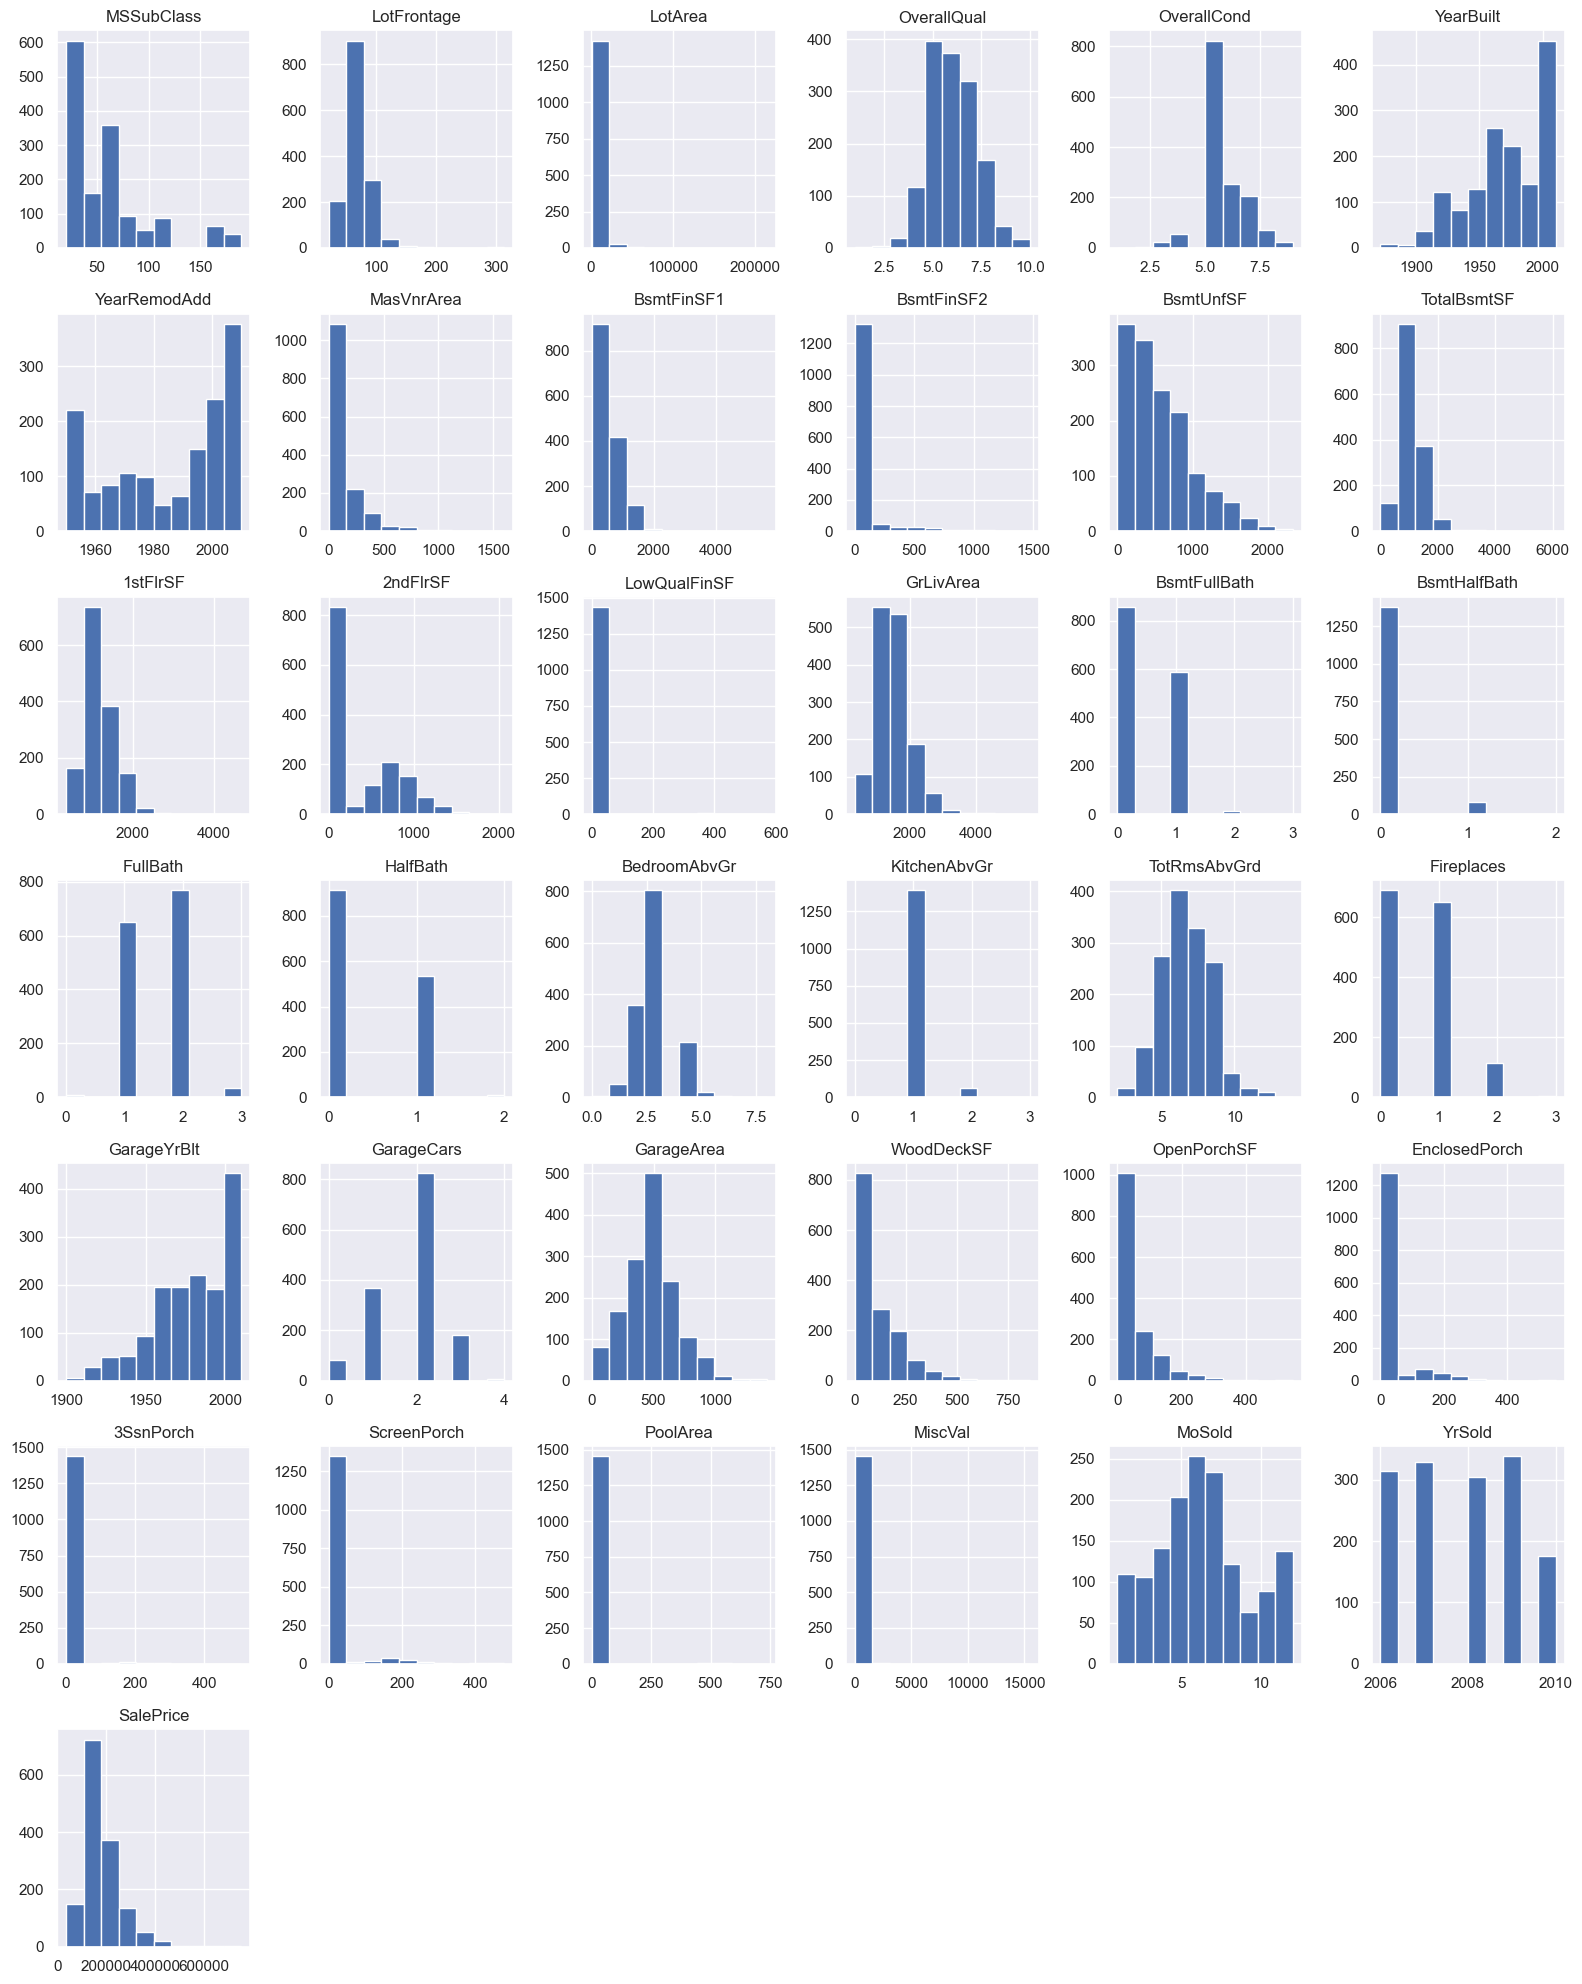

In [244]:
df_train.hist(figsize=(16, 20))
plt.tight_layout()
plt.savefig('hist.png')
plt.show()

## Target Distribution

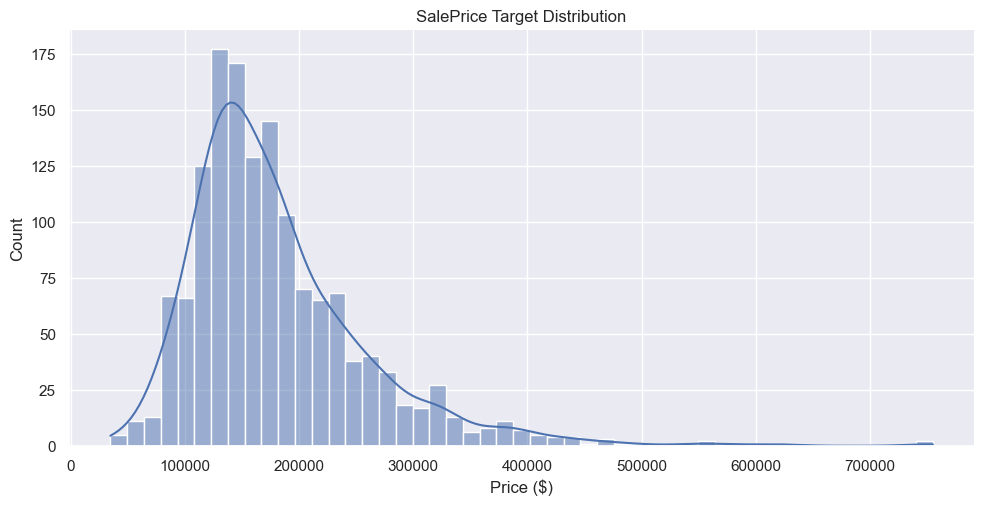

In [245]:
sns.displot(df_train["SalePrice"], kde = True, aspect=2)
plt.title('SalePrice Target Distribution')
plt.xlabel('Price ($)')
plt.savefig('hist2.png')
plt.show()

## Numeric Features Distribution

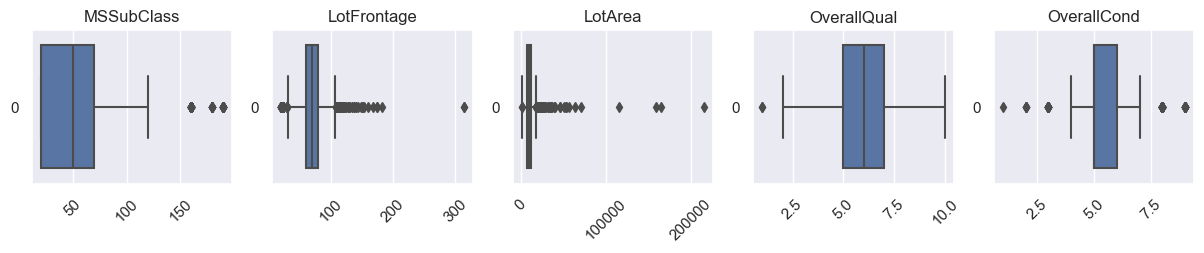

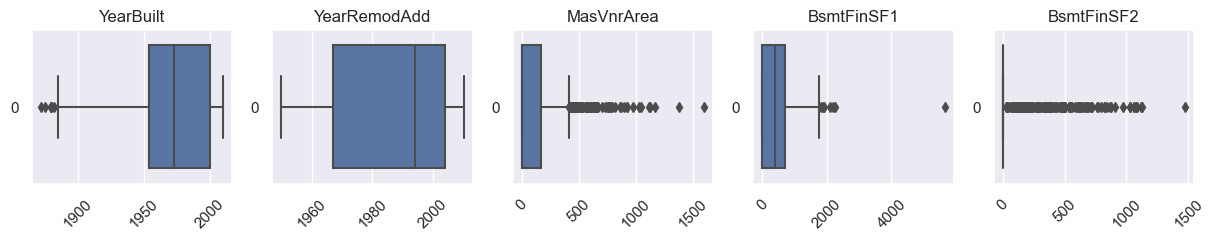

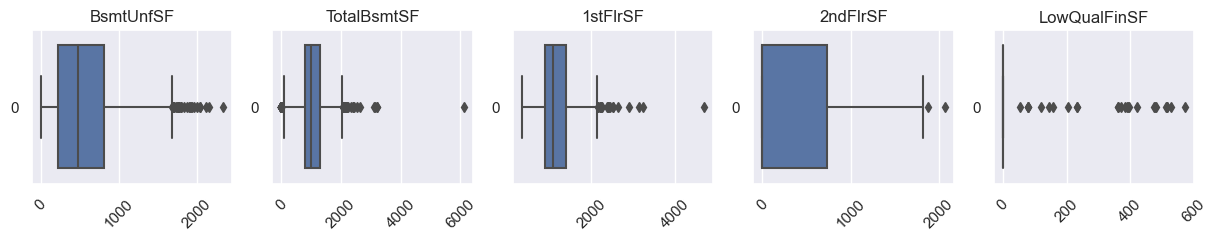

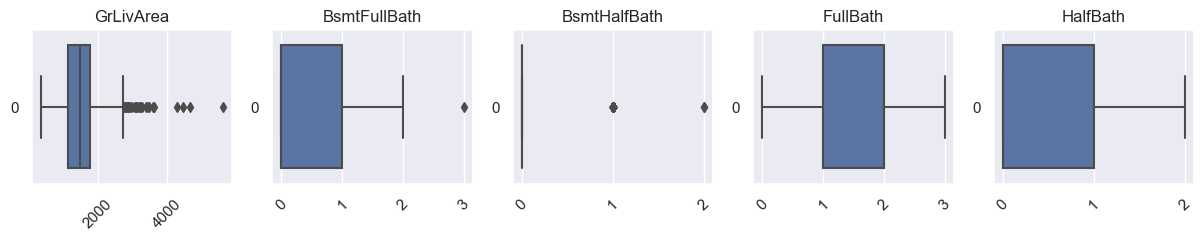

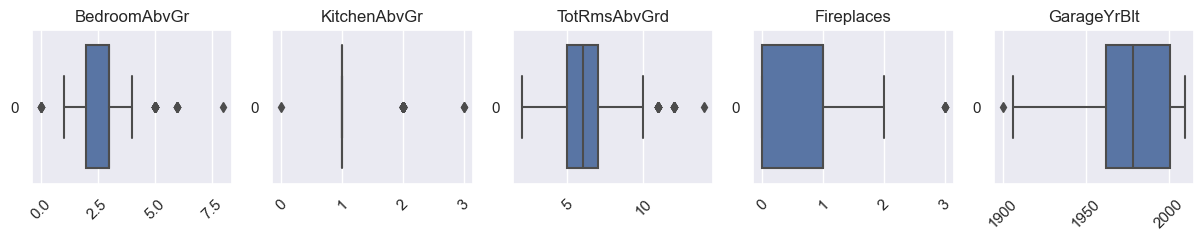

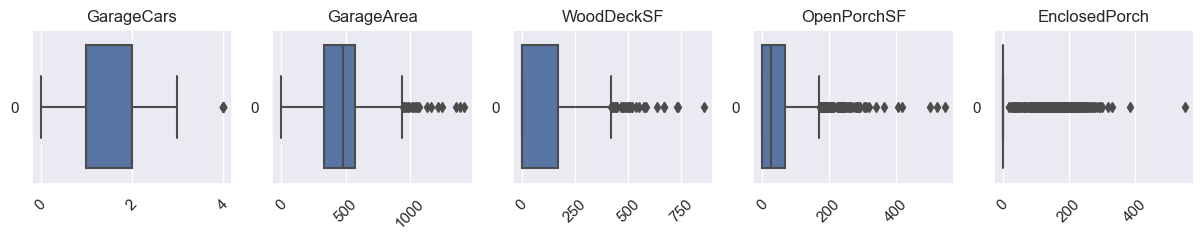

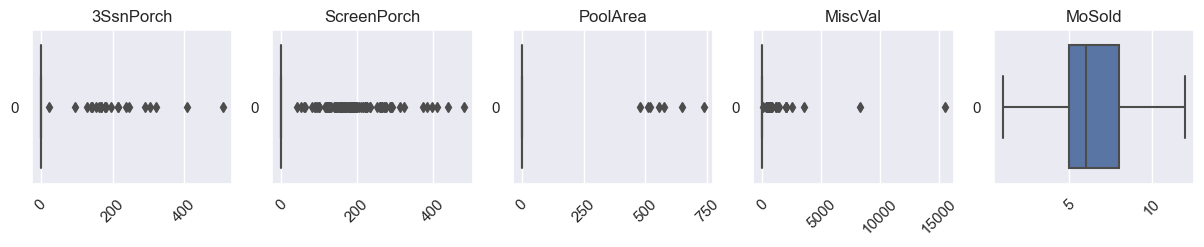

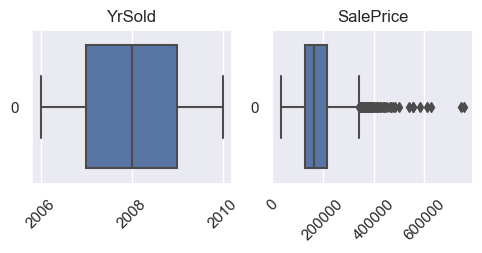

In [254]:
df_train_num = df_train.select_dtypes(include = ['float64', 'int64'])

group_of_columns = [df_train_num.columns[i:i + 5] for i in range(0, len(df_train_num.columns), 5)]

for group in group_of_columns:
    plt.figure(figsize=(15, 2))
    for i, column in enumerate(group, start=1):
        plt.subplot(1, 5, i)
        sns.boxplot(data=df_train_num[column], orient='h')
        plt.title(column)
        plt.xticks(rotation=45)
plt.show()

## Target Distribution


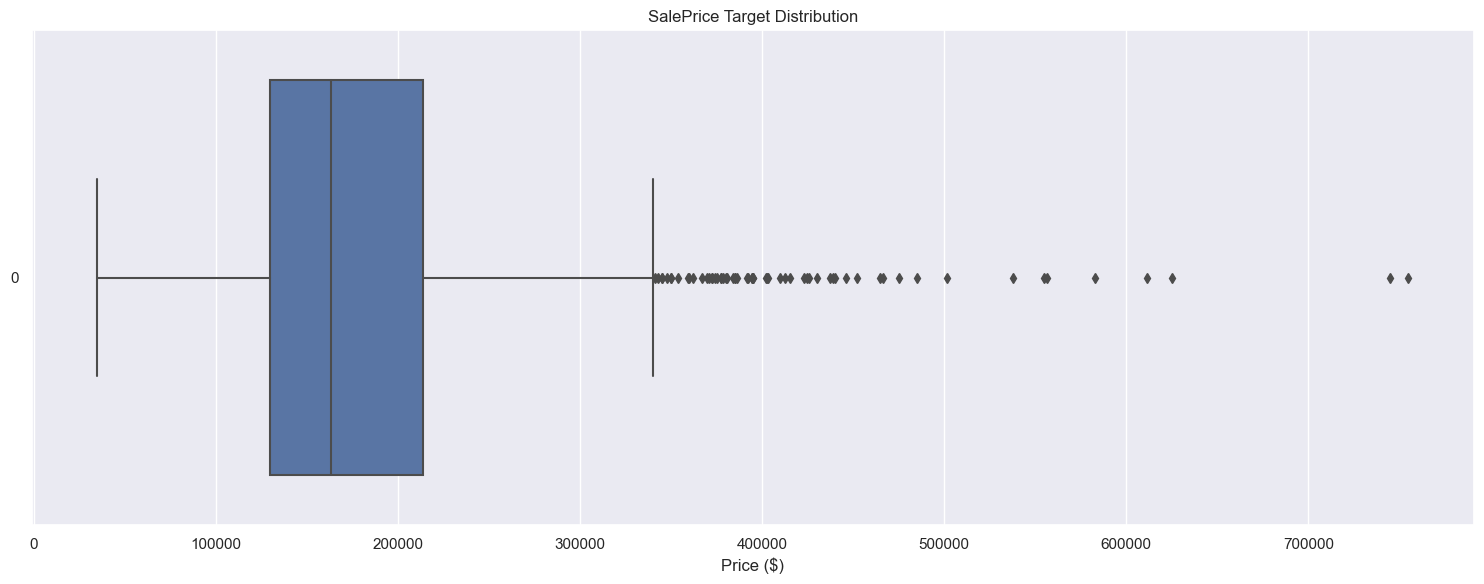

In [249]:
plt.figure(figsize=(15,6))
sns.boxplot(df_train["SalePrice"], orient='h')
plt.title('SalePrice Target Distribution')
plt.xlabel('Price ($)')
plt.tight_layout()
plt.savefig('box2.png')
plt.show()

## Correlation Matrix

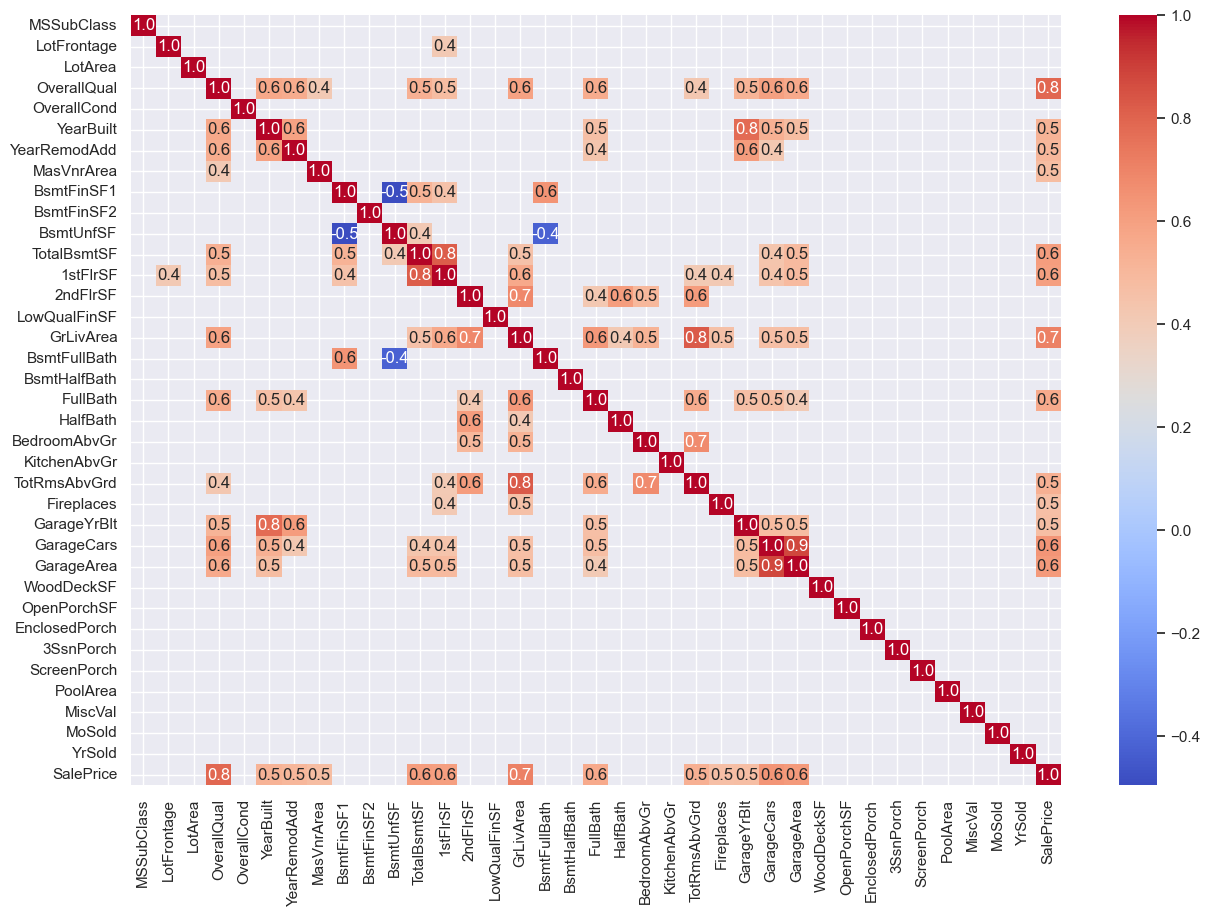

In [255]:
plt.figure(figsize=(15,10))
corr_matrix = df_train_num.corr()
mask = np.logical_or(corr_matrix >= 0.4, corr_matrix <= -0.4)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=~mask, fmt=".1f")
plt.savefig('matrix.png')
plt.show()

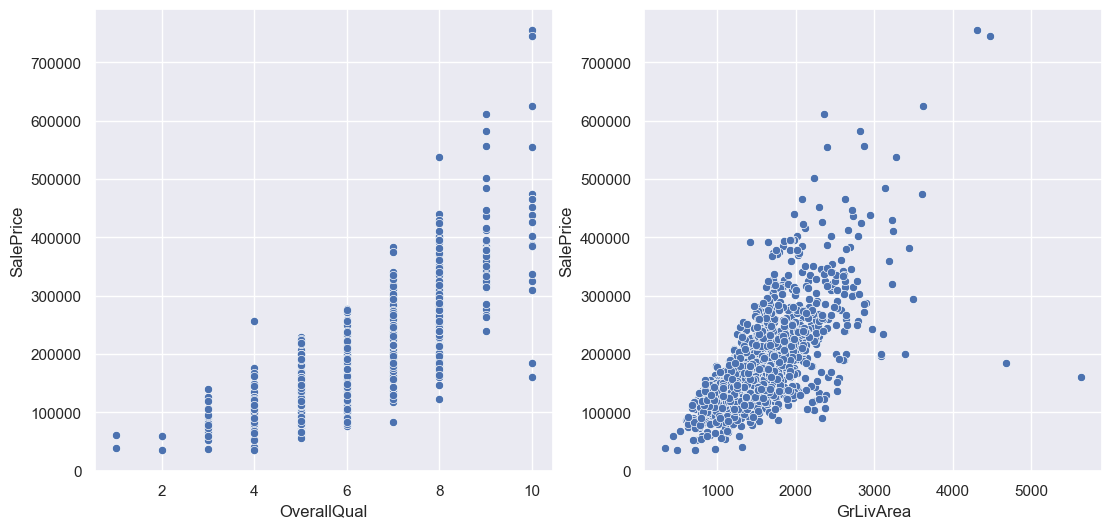

In [190]:
# Plotting the target vs features with higher correlation
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.scatterplot(x=df_train["OverallQual"], y=df_train["SalePrice"])
plt.subplot(122)
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"])
plt.show()

## Categorical Distribution

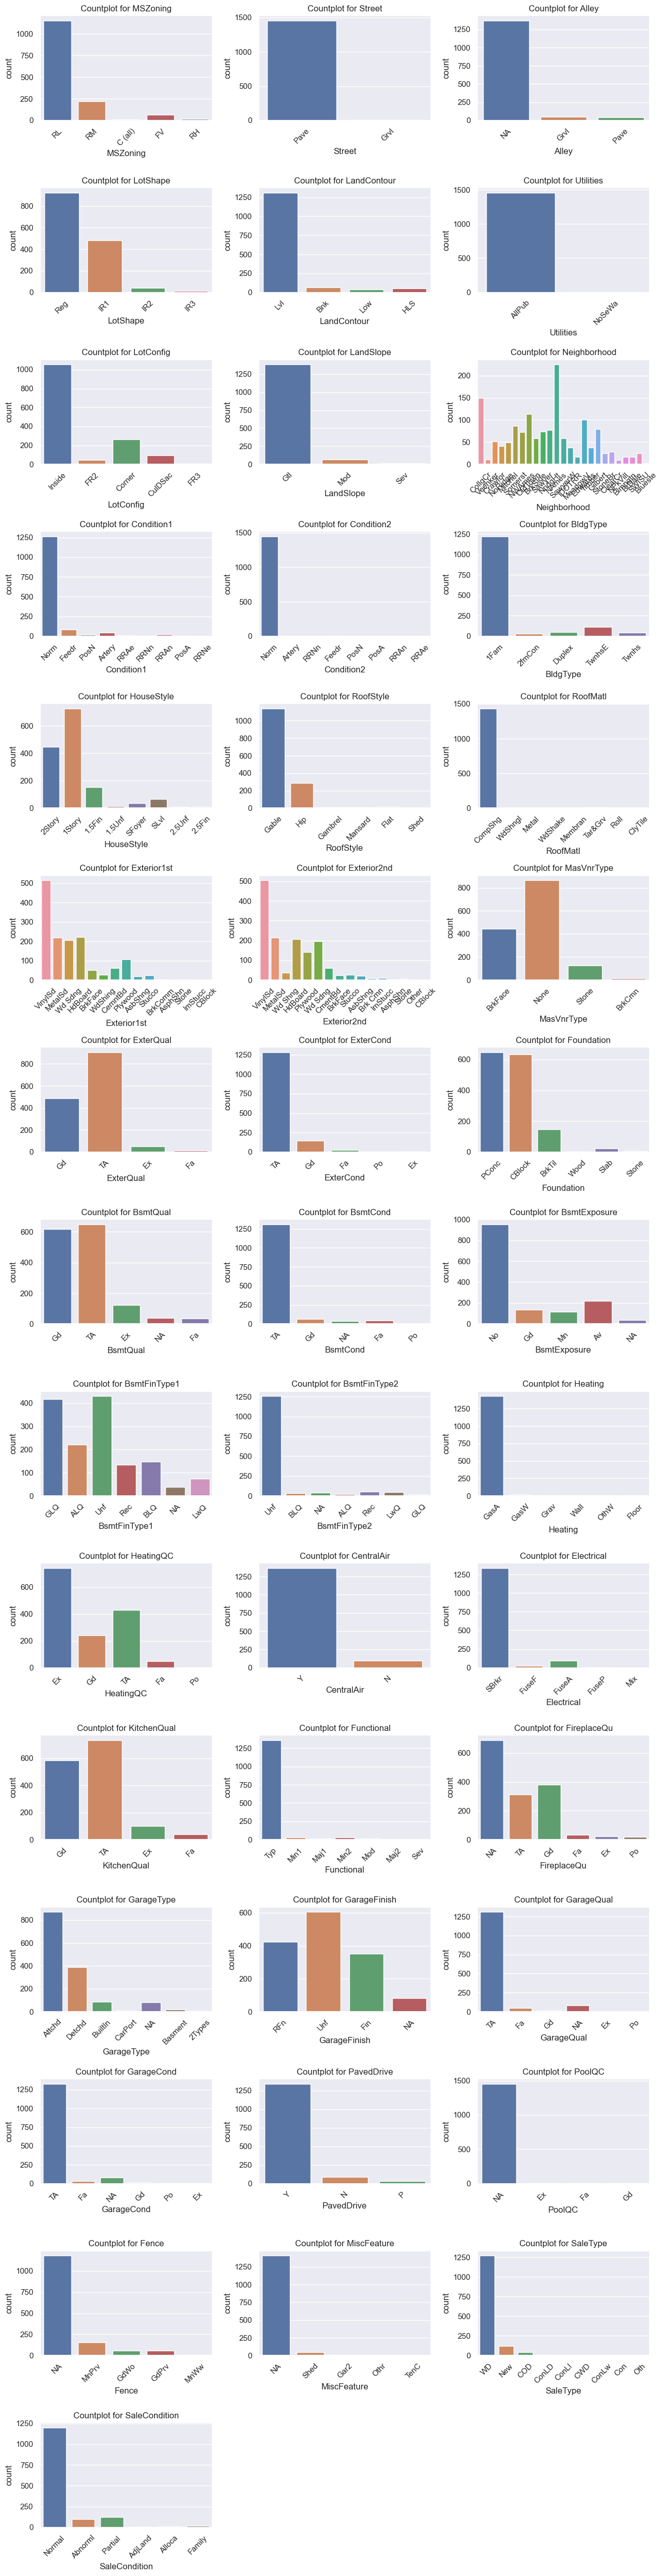

In [256]:
plt.figure(figsize=(13,50))
for i, column in enumerate(df_train_cat.columns):
    plt.subplot((len(df_train_cat.columns)+2)//3, 3, i+1)
    sns.countplot(data=df_train_cat, x=column)
    plt.title(f"Countplot for {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cathist')
plt.show()

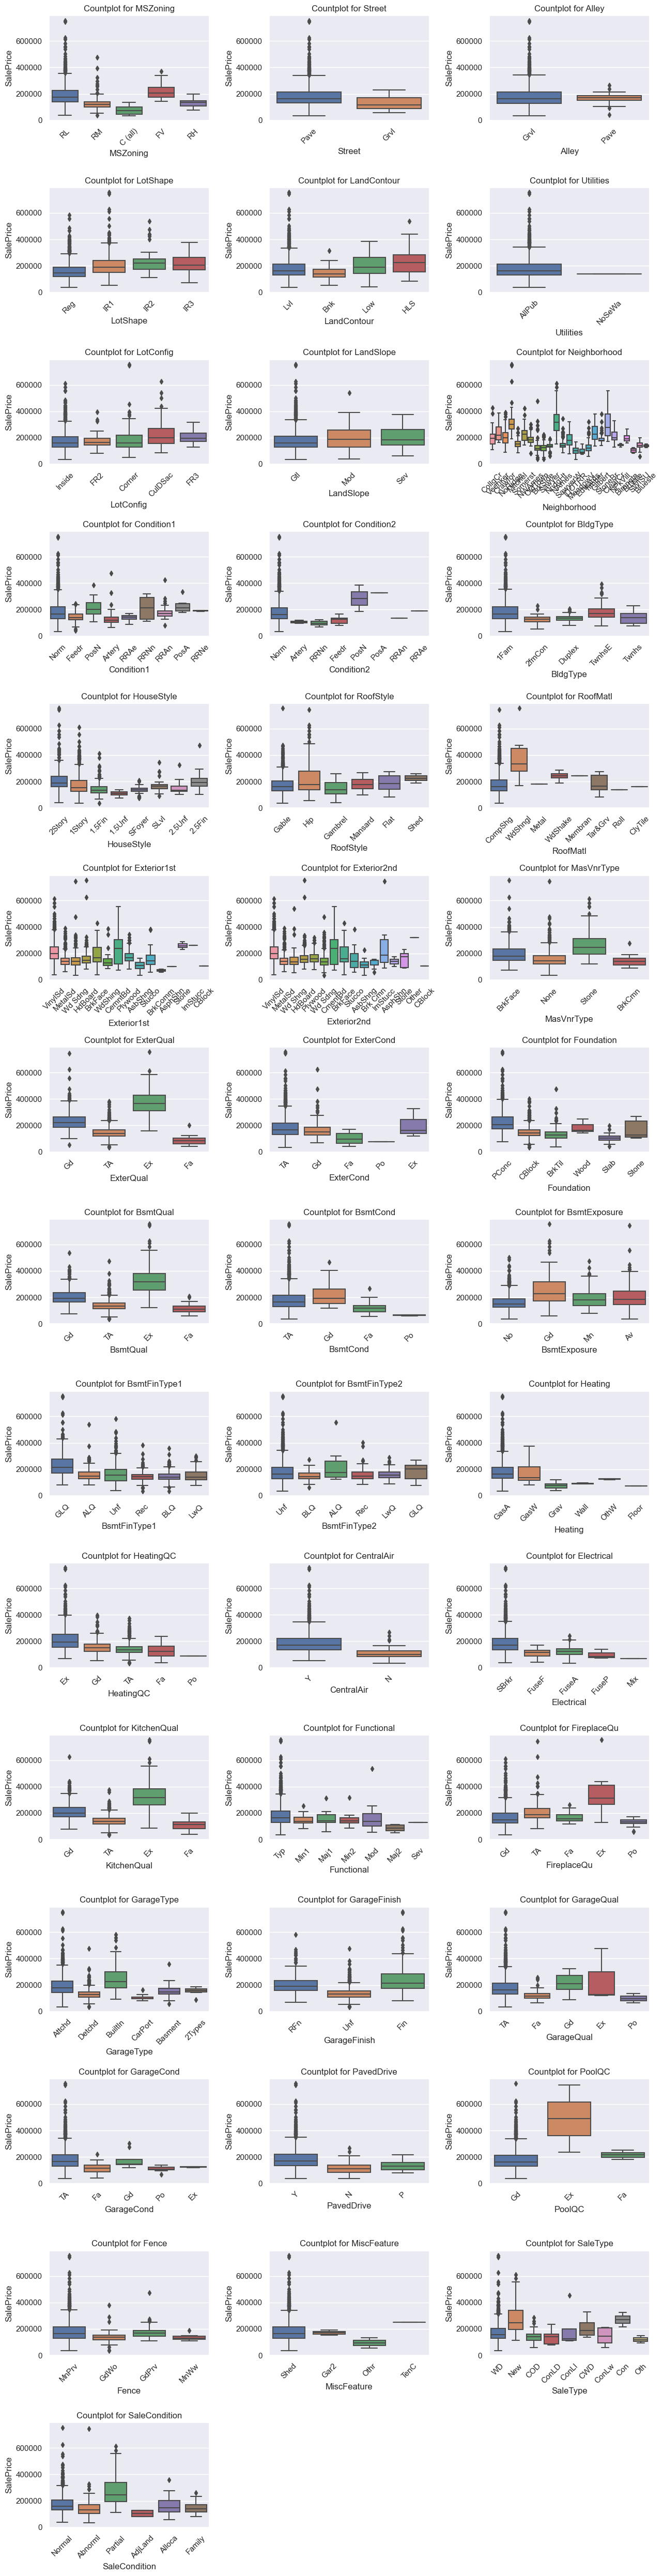

In [257]:
plt.figure(figsize=(13,50))
for i, column in enumerate(df_train_cat.columns):
    plt.subplot((len(df_train_cat.columns)+2)//3, 3, i+1)
    sns.boxplot(data=df_train, x=column, y="SalePrice")
    plt.title(f"Countplot for {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('catbox')
plt.show()

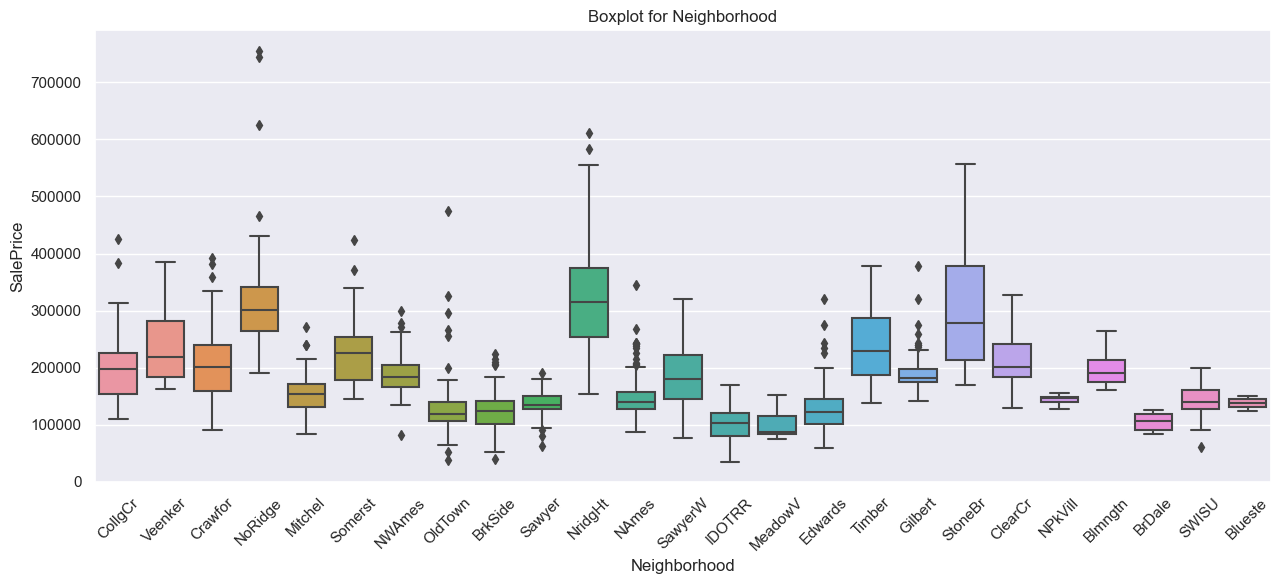

In [267]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df_train, x='Neighborhood', y="SalePrice")
plt.title(f"Boxplot for Neighborhood")
plt.xticks(rotation=45);
plt.tight_layout()
plt.savefig('nghb.png')


# Spliting the data

In [193]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Feature Engineering

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = df_train_num.columns.drop('SalePrice')
cat_features = df_train_cat.columns

preprocessor = ColumnTransformer(
        [
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
        ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [195]:
X = preprocessor.fit_transform(X)
X.shape

(1460, 288)

## Splitting the data

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Model Selection

In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("LinearRegression")
print(f'Train score: {lr.score(X_train, y_train)}')
print(f'Test score: {lr.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso")
print(f'Train score: {lasso.score(X_train, y_train)}')
print(f'Test score: {lasso.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge")
print(f'Train score: {ridge.score(X_train, y_train)}')
print(f'Test score: {ridge.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
print("ElasticNet")
print(f'Train score: {en.score(X_train, y_train)}')
print(f'Test score: {en.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("DecisionTreeRegressor")
print(f'Train score: {dtr.score(X_train, y_train)}')
print(f'Test score: {dtr.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("RandomForestRegressor")
print(f'Train score: {rfr.score(X_train, y_train)}')
print(f'Test score: {rfr.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("GradientBoostingRegressor")
print(f'Train score: {gbr.score(X_train, y_train)}')
print(f'Test score: {gbr.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print()

from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBRegressor")
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

LinearRegression
Train score: 0.944497947989886
Test score: 0.5460413700313946
MSE: 2996997101.8009005
MAE: 22309.960108587617

Lasso
Train score: 0.944480026815873
Test score: 0.5866220073145818
MSE: 2729087111.1144004
MAE: 21174.843889931508

Ridge
Train score: 0.937162747350864
Test score: 0.6820942438364384
MSE: 2098787349.7060928
MAE: 20688.005771737277

ElasticNet
Train score: 0.8602260092644703
Test score: 0.7283955894245515
MSE: 1793109718.8024714
MAE: 20377.14548793186

DecisionTreeRegressor
Train score: 1.0
Test score: 0.5826754784608148
MSE: 2755141766.2219176
MAE: 28765.312328767122

RandomForestRegressor
Train score: 0.9774715855050137
Test score: 0.8472152014974337
MSE: 1008672526.7081997
MAE: 16969.385753424656

GradientBoostingRegressor
Train score: 0.9704358895166674
Test score: 0.8940632420944189
MSE: 699385660.8457189
MAE: 16300.70889833517

XGBRegressor
Train score: 0.9997403262101437
Test score: 0.8256718640258207
MSE: 1150899848.105323
MAE: 17767.690378852738


## Hyperparameter tuning
We'll be tuning XGBRegressor

In [226]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.01, 0.03, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 1000]},
             scoring='r2')

In [229]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000}
0.8702837637612062


In [238]:
xgb_tuned = grid_search.best_estimator_

In [239]:
y_pred = xgb_tuned.predict(X_test)
print(f'Train score: {xgb_tuned.score(X_train, y_train)}')
print(f'Test score: {xgb_tuned.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

Train score: 0.9945794109507115
Test score: 0.8643628826813241
MSE: 895464962.3663135
MAE: 15611.065346746575


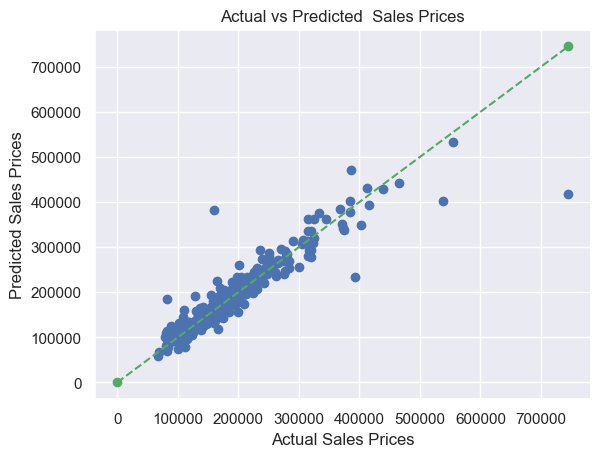

In [270]:
plt.scatter(y_test, y_pred)
plt.plot([0,max(y_test)], [0, max(y_test)], "go--")
plt.xlabel("Actual Sales Prices")
plt.ylabel("Predicted Sales Prices")
plt.title("Actual vs Predicted  Sales Prices")
plt.savefig('actprd.png')
plt.show()

# Conclusion

* The selected model obtained a R2 score of 0.86 on Test data and 0.99 on Train data, further tuning can be evaluated.
* Mean Absolute Error (MAE) of 15611